In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [430]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [431]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/heart_disease.csv")
print(data.shape)
print(data)


(4238, 15)
      Gender  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0          1   39              0         0.0     0.0                0   
1          0   46              0         0.0     0.0                0   
2          1   48              1        20.0     0.0                0   
3          0   61              1        30.0     0.0                0   
4          0   46              1        23.0     0.0                0   
...      ...  ...            ...         ...     ...              ...   
4233       1   50              1         1.0     0.0                0   
4234       1   51              1        43.0     0.0                0   
4235       0   48              1        20.0     NaN                0   
4236       0   44              1        15.0     0.0                0   
4237       0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  

#[*] Plot the data

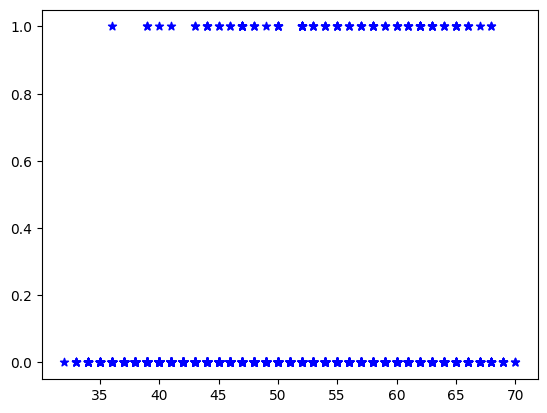

In [432]:
# plt.scatter(data.age, data.currentSmoker, marker='*', color='green')
plt.scatter(data.age, data.diabetes, marker='*', color='blue')

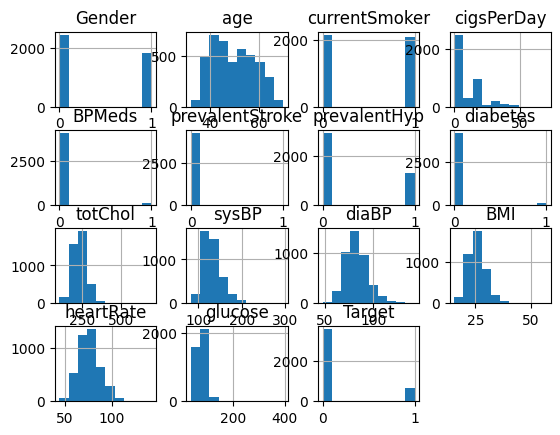

In [433]:
# plt.hist(data, histtype='step')
data.hist()
plt.show()

In [434]:
print(data.columns)
data.info()

Index(['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non

In [435]:
print("Original: \n",data.describe())

Original: 
             Gender          age  currentSmoker   cigsPerDay       BPMeds  \
count  4238.000000  4238.000000    4238.000000  4209.000000  4185.000000   
mean      0.429212    49.584946       0.494101     9.003089     0.029630   
std       0.495022     8.572160       0.500024    11.920094     0.169584   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    49.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      4238.000000   4238.000000  4238.000000  4188.000000  4238.000000   
mean          0.005899      0.310524     0.025720   236.721585   132.352407   
std           0.076587      0.462763     0.158316    44.590334    

#[*] Detailed observation from the data:

In [436]:
#Checking if there is any missing values
print(data.isnull().sum())
# print(data2)

Gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Target               0
dtype: int64


In [437]:
#grouping the mean of the features of the data according to the target value, here it (0 or 1) or (Well or Unwell)
data.groupby('Target').mean()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
Target,,,,,,,,,,,,,,
0,0.410684,48.767668,0.489983,8.710401,0.023367,0.003895,0.275737,0.019199,235.172530,130.333612,82.160963,25.673007,75.762382,80.682125
1,0.532609,54.145963,0.517081,10.629283,0.064771,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


#[*] Assuming the target variable is 'Heart_ stroke'
#[*] Here, 0 --> Good Heart and 1 --> Bad Heart


In [438]:
data['Target'].value_counts()

0    3594
1     644
Name: Target, dtype: int64

##[*] When a column is droped, axix = 1
##[*] while dropping a row the, axis = 0
##[*] drop() method  

#[*] sklearn dependencies:

In [439]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [440]:
#removing all the rows containing missing values and storing it to cln_data variable
cln_data = data.dropna()
# print(cln_data)
cln_data.describe()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Target
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [441]:
#Spiting the Features and the Target:
X = cln_data.drop(columns = 'Target', axis=1)
Y = cln_data['Target']
# print(X)
# print(Y)

In [442]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.11635803 -1.2346638  -0.97705693 ...  0.28542409  0.35931906
  -0.20444626]
 [-0.89576997 -0.41768745 -0.97705693 ...  0.71835091  1.61390166
  -0.24631379]
 [ 1.11635803 -0.18426563  1.02348181 ... -0.11552519 -0.05887514
  -0.49751902]
 ...
 [ 1.11635803  0.04915618  1.02348181 ...  0.03944294 -0.8116247
   0.17236158]
 [ 1.11635803  0.16586709  1.02348181 ... -1.50039906 -0.89526354
  -0.5812541 ]
 [-0.89576997  0.282578   -0.97705693 ... -1.06747224  0.35931906
   1.05157988]]


In [443]:
X = X_scaled
# Y = data['Heart_ stroke']
print(X)
print(Y)

[[ 1.11635803 -1.2346638  -0.97705693 ...  0.28542409  0.35931906
  -0.20444626]
 [-0.89576997 -0.41768745 -0.97705693 ...  0.71835091  1.61390166
  -0.24631379]
 [ 1.11635803 -0.18426563  1.02348181 ... -0.11552519 -0.05887514
  -0.49751902]
 ...
 [ 1.11635803  0.04915618  1.02348181 ...  0.03944294 -0.8116247
   0.17236158]
 [ 1.11635803  0.16586709  1.02348181 ... -1.50039906 -0.89526354
  -0.5812541 ]
 [-0.89576997  0.282578   -0.97705693 ... -1.06747224  0.35931906
   1.05157988]]
0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: Target, Length: 3749, dtype: int64


In [444]:
# Splitting the Data into Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [445]:
print(X.shape, X_train.shape, X_test.shape)

(3749, 14) (2999, 14) (750, 14)


#[*] Model Training:

In [446]:
# model = svm.SVC(kernel='linear')
model = LogisticRegression()

In [447]:
model.fit(X_train, Y_train)

LogisticRegression()

#[*] Acurracy for Training data

In [448]:
X_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(X_train_pred, Y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8536178726242081


#[*] Acurracy for Testing data

In [449]:
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.8493333333333334
